# 1) Data Preparation

## i) Data Cleaning
### Load Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
rental_df = pd.read_csv('Mudah_Rental list.csv')
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   property_type          19991 non-null  object 
 2   prop_name              19043 non-null  object 
 3   completion_year        10806 non-null  float64
 4   monthly_rent           19989 non-null  float64
 5   district               19991 non-null  object 
 6   parking                14289 non-null  float64
 7   bathroom               19985 non-null  float64
 8   size                   19991 non-null  int64  
 9   furnished              19986 non-null  object 
 10  facilities             17782 non-null  object 
 11  additional_facilities  14043 non-null  object 
 12  region                 19991 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [3]:
rental_df.head(5)

,ads_id,property_type,prop_name,completion_year,monthly_rent,district,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,Condominium,The Hipster @ Taman Desa,2022.0,4200.0,Taman Desa,2.0,6.0,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Condominium,Segar Courts,NaN,2300.0,Cheras,1.0,2.0,1170,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Apartment,Pangsapuri Teratak Muhibbah 2,NaN,1000.0,Taman Desa,NaN,2.0,650,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Apartment,Sentul Point Suite Apartment,2020.0,1700.0,Sentul,1.0,2.0,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Service Residence,Arte Mont Kiara,NaN,1299.0,Mont Kiara,1.0,1.0,494,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [4]:
rental_df.describe()

,ads_id,completion_year,monthly_rent,parking,bathroom,size
count,1.999100e+04,10806.000000,1.998900e+04,14289.000000,19985.000000,1.999100e+04
mean,9.970671e+07,2014.822321,2.269084e+03,1.416824,1.891719,5.922172e+03
std,3.482575e+06,6.735355,2.241285e+04,0.567368,0.556266,7.072596e+05
min,1.652551e+07,1977.000000,7.000000e+01,1.000000,1.000000,1.000000e+00
25%,9.984012e+07,2012.000000,1.100000e+03,1.000000,2.000000,7.500000e+02
50%,1.002127e+08,2017.000000,1.400000e+03,1.000000,2.000000,8.860000e+02
75%,1.006179e+08,2020.000000,1.800000e+03,2.000000,2.000000,1.044000e+03
max,1.008546e+08,2025.000000,2.400000e+06,10.000000,8.000000,1.000000e+08


## Check for duplicates and missing values

In [5]:
rental_df.duplicated().sum()

8

In [6]:
rental_df.isna().sum()

ads_id                      0
property_type               0
prop_name                 948
completion_year          9185
monthly_rent                2
district                    0
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

In [7]:
#Drop duplicates row

rental_df.drop_duplicates(inplace=True)

In [8]:
# Calculate median parking spots for each property type and convert it to a dictionary

average_parking = rental_df.groupby('property_type')['parking'].median().to_dict()

# Fill missing values in the parking column with the median value for each property type

rental_df['parking'] = rental_df['parking'].fillna(rental_df['property_type'].map(average_parking))

In [9]:
#Dropping all type of missing values

cleanrental_df = rental_df.dropna(subset = ['completion_year',
                                            'monthly_rent',
                                            'parking',
                                            'bathroom',
                                            'furnished',
                                           'facilities',
                                           'additional_facilities'])

In [10]:
cleanrental_df.isna().sum()

ads_id                   0
property_type            0
prop_name                0
completion_year          0
monthly_rent             0
district                 0
parking                  0
bathroom                 0
size                     0
furnished                0
facilities               0
additional_facilities    0
region                   0
dtype: int64

In [11]:
cleanrental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7618 entries, 0 to 19990
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 7618 non-null   int64  
 1   property_type          7618 non-null   object 
 2   prop_name              7618 non-null   object 
 3   completion_year        7618 non-null   float64
 4   monthly_rent           7618 non-null   float64
 5   district               7618 non-null   object 
 6   parking                7618 non-null   float64
 7   bathroom               7618 non-null   float64
 8   size                   7618 non-null   int64  
 9   furnished              7618 non-null   object 
 10  facilities             7618 non-null   object 
 11  additional_facilities  7618 non-null   object 
 12  region                 7618 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 833.2+ KB


In [12]:
#Changing datatype of float into integers

cleanrental_df = cleanrental_df.astype({
    'completion_year': 'int',
    'monthly_rent': 'int',
    'parking': 'int',
    'bathroom' : 'int'
})

## Removal of outliers

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

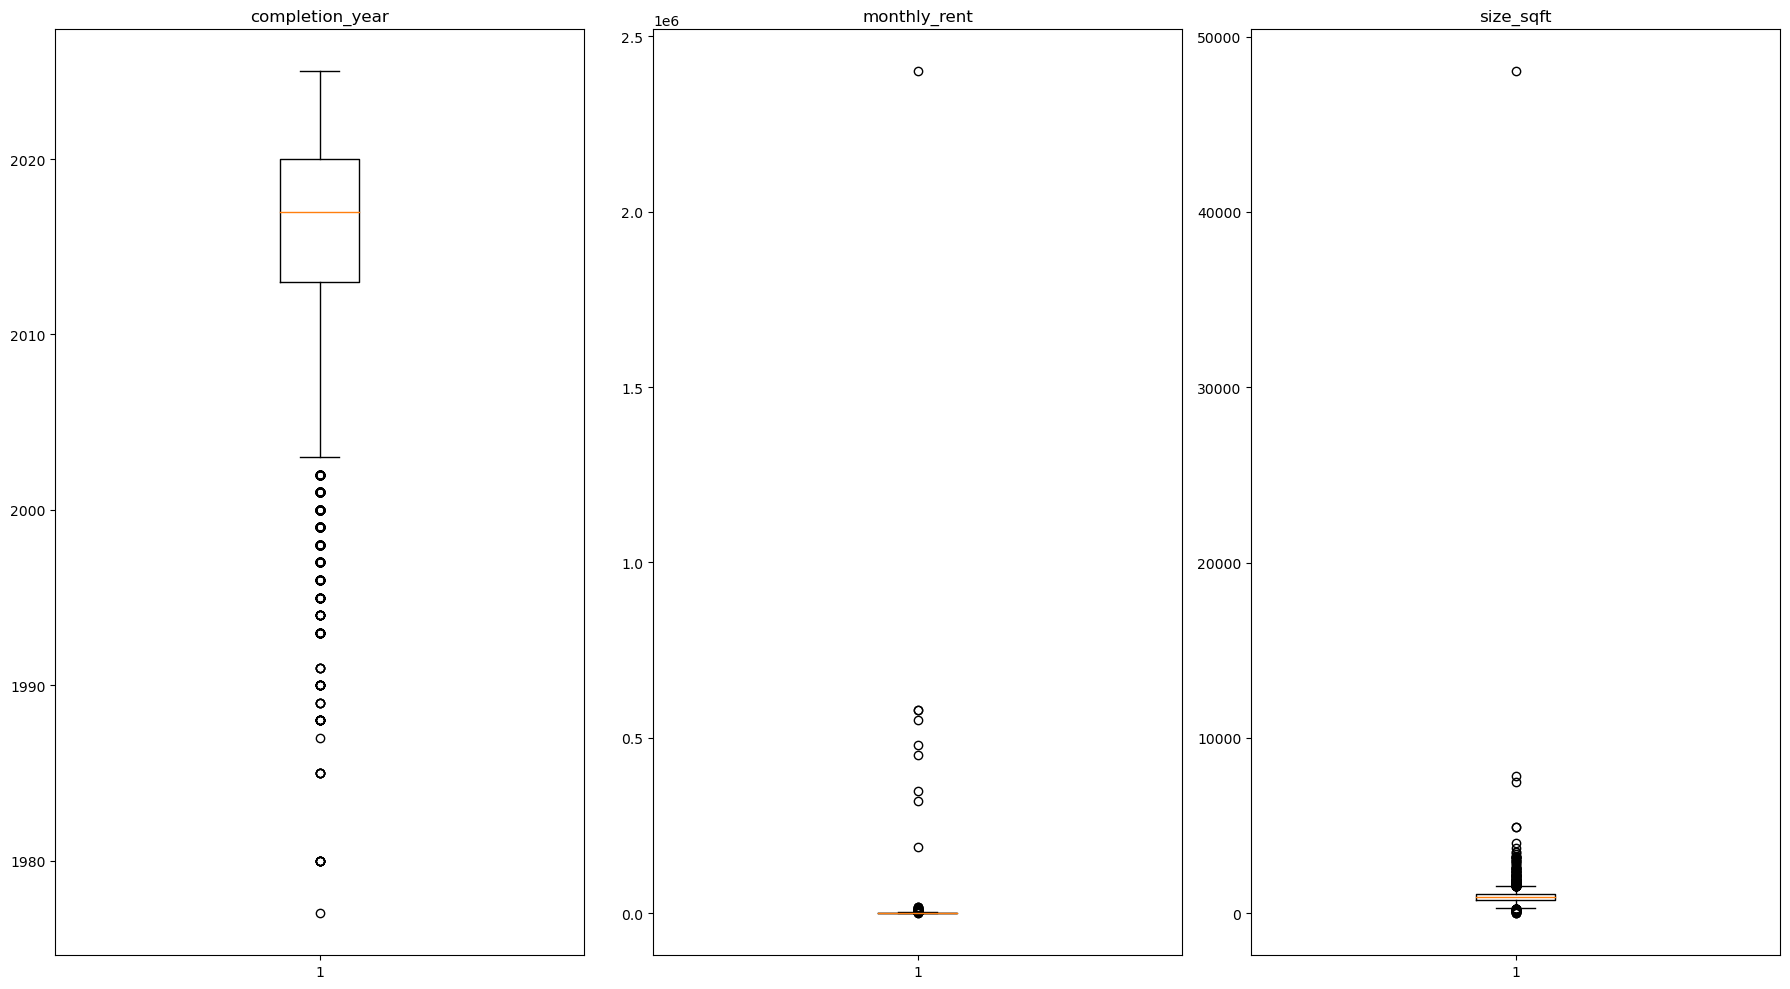

In [14]:
#create boxplots to see distribution of data for numerical column with continous value
fig, axs = plt.subplots(1, 3, figsize=(18,10))

#plot each boxplot
axs[0].boxplot(cleanrental_df['completion_year'])
axs[1].boxplot(cleanrental_df['monthly_rent'])
axs[2].boxplot(cleanrental_df['size'])

#assign title
axs[0].set_title('completion_year')
axs[1].set_title('monthly_rent')
axs[2].set_title('size_sqft')

plt.tight_layout()
plt.show()

In [15]:
cleanrental_df[['size', 'monthly_rent']].describe()

,size,monthly_rent
count,7618.000000,7.618000e+03
mean,931.037674,2.546798e+03
std,637.342915,3.119101e+04
min,1.000000,1.500000e+02
25%,751.000000,1.300000e+03
50%,900.000000,1.600000e+03
75%,1068.000000,2.000000e+03
max,48010.000000,2.400000e+06


In [16]:
#remove obvious outliers and describe again

cleanrental_df = cleanrental_df[(cleanrental_df['size'] > 100) &
                                (cleanrental_df['size'] < 48010) &
                                (cleanrental_df['monthly_rent'] > 100) &
                                (cleanrental_df['monthly_rent'] < 2400000)]

cleanrental_df[['size', 'monthly_rent']].describe()

,size,monthly_rent
count,7604.000000,7604.000000
mean,925.986191,2234.417280
std,337.470672,14784.427591
min,120.000000,150.000000
25%,753.000000,1300.000000
50%,900.000000,1600.000000
75%,1068.000000,2000.000000
max,7800.000000,580000.000000


In [17]:
#removing outliers based on IQR from description
#Calculate IQR (IQR = Q3 - Q1)

# Calculate the lower and upper bounds for 'size'
lowerbound_size = 753 - (1.5*(1068 - 753))
upperbound_size = 1068 + (1.5*(1068 - 753))

# Calculate the lower and upper bounds for 'monthly_rent'
lowerbound_rent = 1300 - (1.5*(2000 - 1300))
upperbound_rent = 2000 + (1.5*(2000 - 1300))

print('lower bound and upperbound for column size is', lowerbound_size, '&', upperbound_size)
print('lower bound and upperbound for column rent is', lowerbound_rent, '&', upperbound_rent)

lower bound and upperbound for column size is 280.5 & 1540.5
lower bound and upperbound for column rent is 250.0 & 3050.0


In [18]:
#remove outliers based on IQR

cleanrental_df = cleanrental_df[(cleanrental_df['size'] >= lowerbound_size) &
                                (cleanrental_df['size'] <= upperbound_size) &
                                (cleanrental_df['monthly_rent'] >= lowerbound_rent) &
                                (cleanrental_df['monthly_rent'] <= upperbound_rent)]

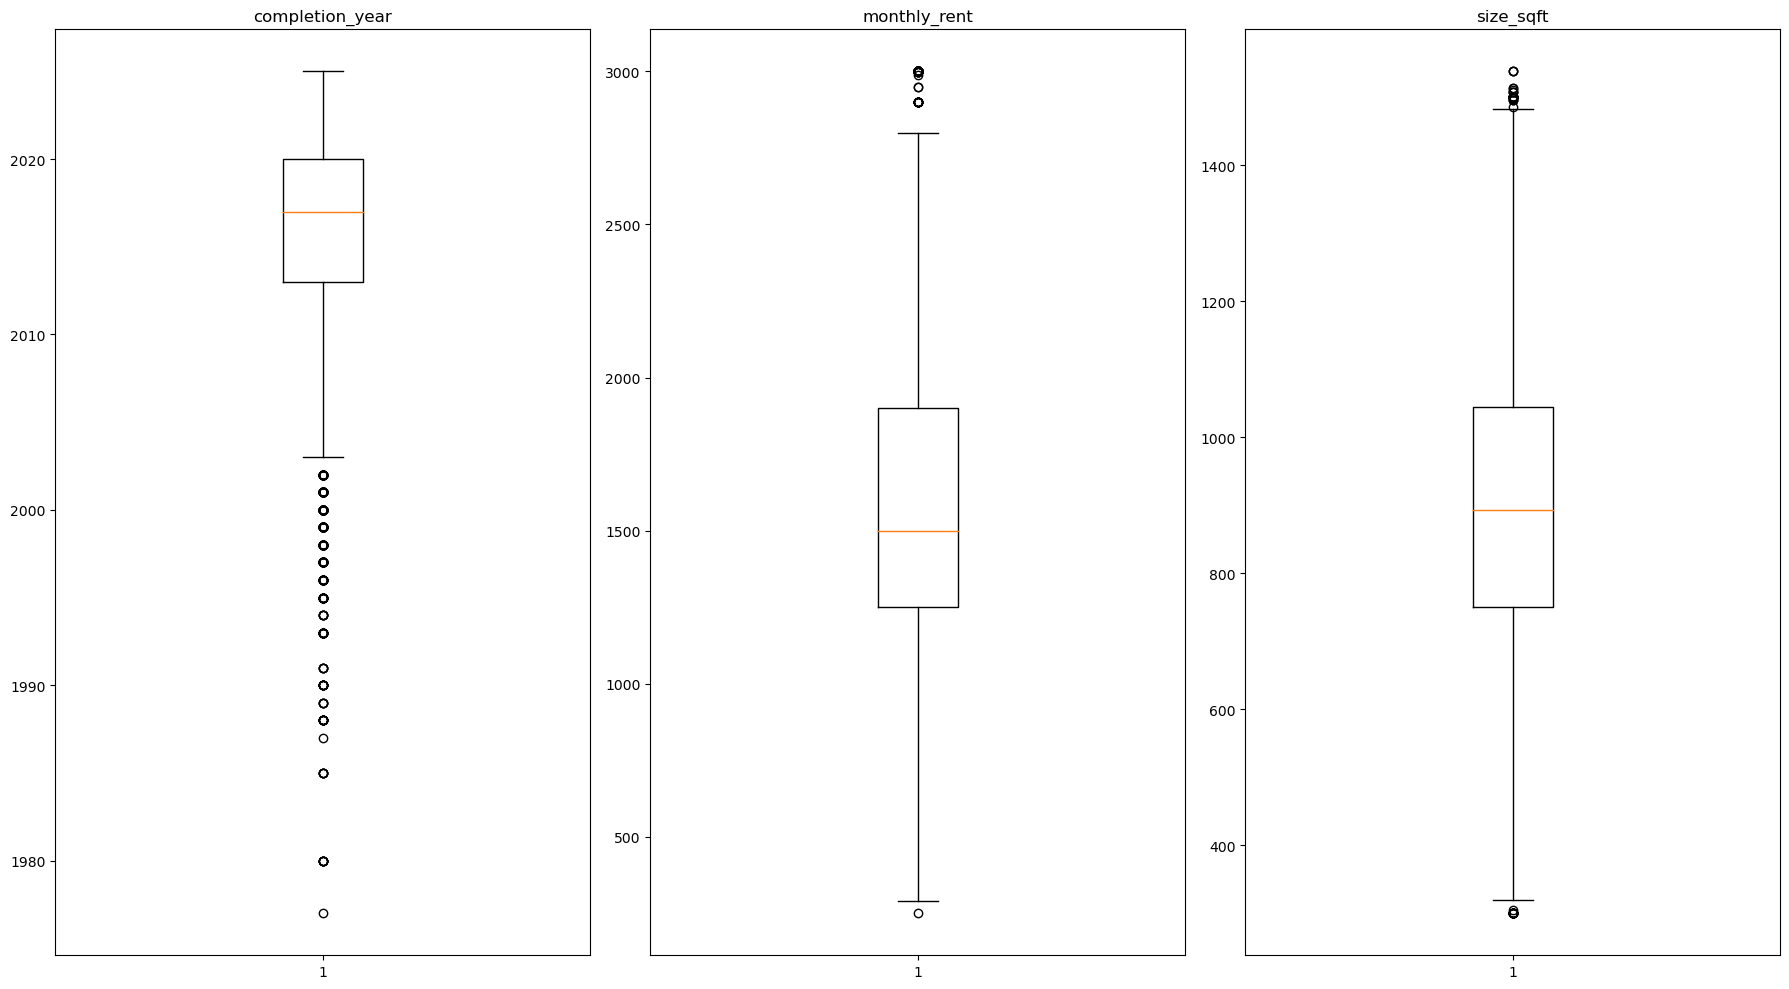

In [19]:
#distribution of continous value after outliers removal
fig, axs = plt.subplots(1, 3, figsize=(18,10))

#plot each boxplot
axs[0].boxplot(cleanrental_df['completion_year'])
axs[1].boxplot(cleanrental_df['monthly_rent'])
axs[2].boxplot(cleanrental_df['size'])

#assign title
axs[0].set_title('completion_year')
axs[1].set_title('monthly_rent')
axs[2].set_title('size_sqft')

plt.tight_layout()
plt.show()

In [20]:
#Resetting the index rows number

cleanrental_df.reset_index(drop=True, inplace=True)

## ii) Data Transformation

In [21]:
#Extracting nearby ktm/lrt into a new column

cleanrental_df['nearby KTM/LRT'] = cleanrental_df['additional_facilities']\
                    .str.contains('Near KTM/LRT')\
                    .map({True: 'Yes', False: 'No'})

In [22]:
#Drop insignificant column

cleanrental_df = cleanrental_df.drop(columns = ['ads_id'])

In [23]:
#Extract column based on years completion binned

# Define the bin edges for each decade
bin_edges = [1970, 1980, 1990, 2000, 2010, 2020, 2030]
bin_labels = ['1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

# Bin the completion_year values and create a new column
cleanrental_df['decade'] = pd.cut(cleanrental_df['completion_year'], 
                                  bins=bin_edges, labels=bin_labels, right=True)

In [24]:
cleanrental_df.head(5)

,property_type,prop_name,completion_year,monthly_rent,district,parking,bathroom,size,furnished,facilities,additional_facilities,region,nearby KTM/LRT,decade
0,Apartment,Sentul Point Suite Apartment,2020,1700,Sentul,1,2,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,Yes,2010s
1,Service Residence,Arte Plus Jalan Ampang,2018,1550,Ampang,1,1,700,Fully Furnished,"Parking, Gymnasium, Playground, Security, Lift...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,Yes,2010s
2,Apartment,Nova I,2014,1400,Segambut,1,1,750,Fully Furnished,"Playground, Security, Parking, Lift, Swimming ...","Air-Cond, Cooking Allowed, Washing Machine, Ne...",Kuala Lumpur,Yes,2010s
3,Service Residence,The Park Sky Residence @ Bukit Jalil City,2019,2600,Bukit Jalil,1,2,868,Partially Furnished,"Parking, Playground, Swimming Pool, Security, ...","Cooking Allowed, Near KTM/LRT",Kuala Lumpur,Yes,2010s
4,Service Residence,PV9 Residences @ Taman Melati,2022,2000,Setapak,2,2,1100,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,Yes,2020s


# 2) Exploratory Data Analysis
## Data Visualization

In [25]:
#To exclude property type with insignificant representation number

cleanrental_df = cleanrental_df[~cleanrental_df['property_type'].str.contains('Others|Flat|Townhouse Condo')]

In [26]:
cleanrental_df['property_type'].value_counts()

Condominium          3158
Service Residence    2709
Apartment             956
Studio                111
Duplex                 36
Name: property_type, dtype: int64

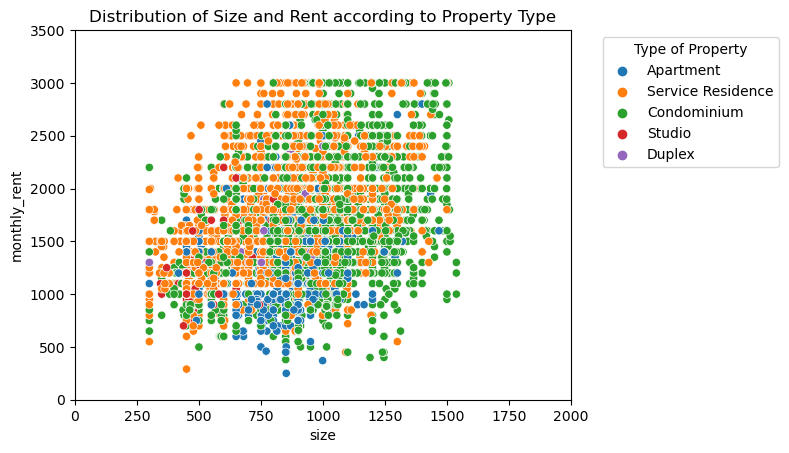

In [27]:
#distribution of property type

sns.scatterplot(data = cleanrental_df,
               x = 'size',
               y = 'monthly_rent',
               hue = 'property_type')

plt.title('Distribution of Size and Rent according to Property Type')
plt.xlim(0, 2000)
plt.ylim(0, 3500)
plt.legend(title='Type of Property', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

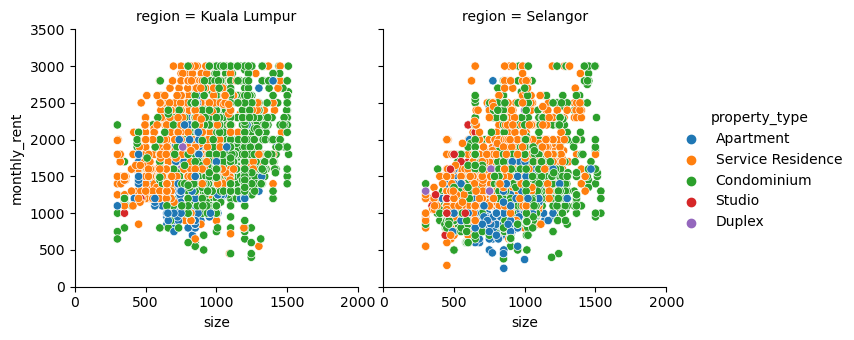

<Figure size 2000x1000 with 0 Axes>

In [28]:
# distribution of property type in relation to region subgroup

sns.relplot(data = cleanrental_df,
           x = 'size',
           y = 'monthly_rent',
           kind = 'scatter',
            hue = 'property_type',
           col = 'region',
           col_wrap = 2,
           height = 3.5,
           aspect = 1)

plt.xlim(0, 2000)
plt.ylim(0, 3500)
plt.figure(figsize=(20, 10))
plt.show()

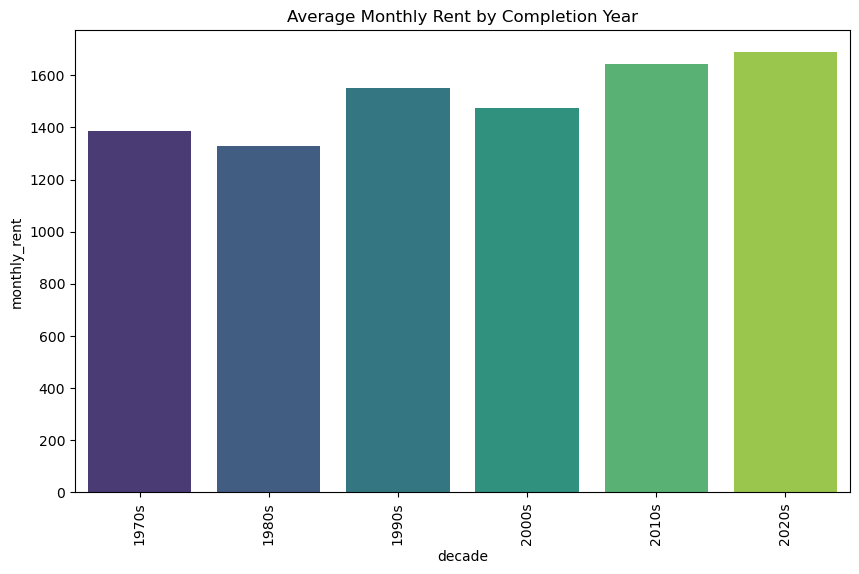

In [29]:
#distribution of rent based on completion_year

type_mean = cleanrental_df.groupby('decade')['monthly_rent'].mean()
type_mean_df = type_mean.reset_index().sort_values(by='monthly_rent', ascending=True)

#Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='decade', y='monthly_rent', data=type_mean_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Monthly Rent by Completion Year')
plt.show()

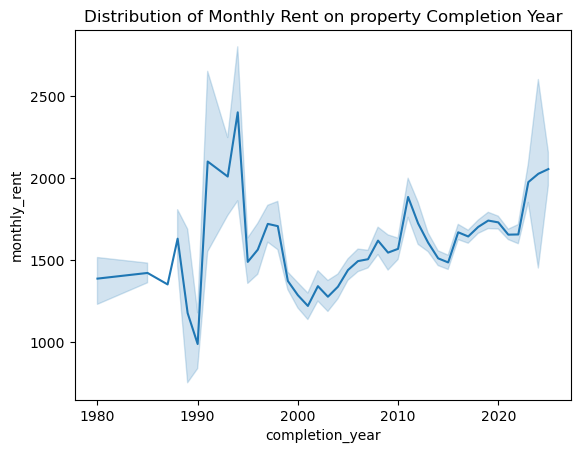

In [30]:
#Line plot for trends of monthly rental on property ages

sns.lineplot(data = cleanrental_df,
             x = 'completion_year',
             y = 'monthly_rent')
plt.title('Distribution of Monthly Rent on property Completion Year')
plt.show()

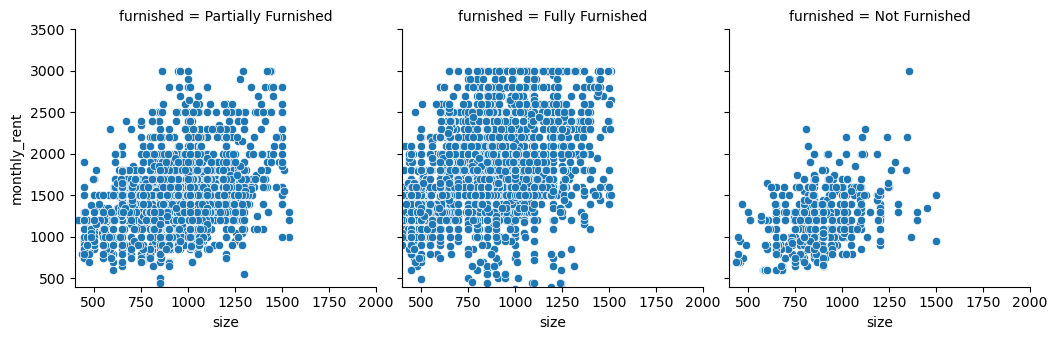

<Figure size 2000x1000 with 0 Axes>

In [31]:
# distribution of rent and size according to furnished subgroup

sns.relplot(data = cleanrental_df,
           x = 'size',
           y = 'monthly_rent',
           kind = 'scatter',
           col = 'furnished',
           col_wrap = 3,
           height = 3.5,
           aspect = 1)

plt.xlim(400, 2000)
plt.ylim(400, 3500)
plt.figure(figsize=(20, 10))
plt.show()

In [32]:
!pip install wordcloud
from wordcloud import WordCloud

In [33]:
from collections import Counter

facilities_list = (cleanrental_df['facilities'] + ', ' + cleanrental_df['additional_facilities']).tolist()

facilities_count = Counter()

for facilities in facilities_list:
    facility_individual = [facility.strip() for facility in facilities.split(',')]
    facilities_count.update(facility_individual)
    
print(facilities_count)

Counter({'Security': 6798, 'Cooking Allowed': 6429, 'Parking': 6394, 'Playground': 6376, 'Swimming Pool': 6348, 'Air-Cond': 5918, 'Gymnasium': 5910, 'Lift': 5532, 'Minimart': 4403, 'Barbeque area': 4257, 'Washing Machine': 4182, 'Multipurpose hall': 4005, 'Jogging Track': 3827, 'Near KTM/LRT': 3819, 'Sauna': 3102, 'Tennis Court': 1902, 'Squash Court': 1835, 'Club house': 1716, 'Internet': 1255})


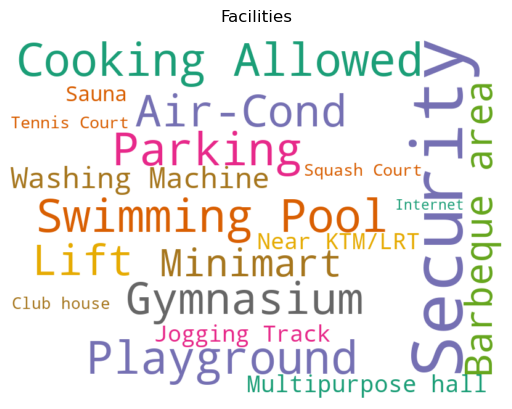

In [34]:
wordcloud = WordCloud(width = 800, height = 600, background_color = 'white', colormap ='Dark2').generate_from_frequencies(facilities_count)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Facilities')
plt.axis('off')
plt.show()

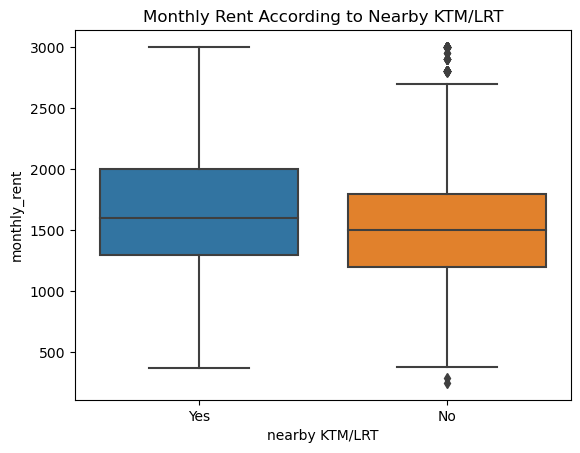

In [35]:
# Distribution of monthly rental according to proximity towards public transportation

sns.boxplot(data = cleanrental_df,
           x = 'nearby KTM/LRT',
           y = 'monthly_rent')

plt.title('Monthly Rent According to Nearby KTM/LRT')
plt.show()

In [36]:
cleanrental_df.groupby('nearby KTM/LRT')['monthly_rent'].median()

nearby KTM/LRT
No     1500.0
Yes    1600.0
Name: monthly_rent, dtype: float64

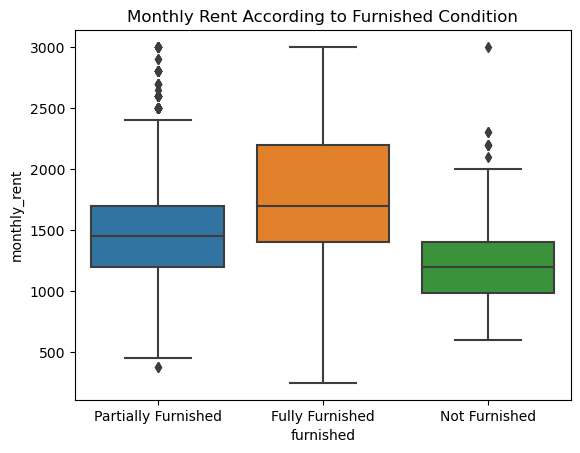

In [37]:
sns.boxplot(data = cleanrental_df,
           x = 'furnished',
           y = 'monthly_rent')

plt.title('Monthly Rent According to Furnished Condition')
plt.show()

In [38]:
pd.crosstab(cleanrental_df['furnished'], cleanrental_df['region'],
           values = cleanrental_df['monthly_rent'],
           aggfunc = 'median')

region,Kuala Lumpur,Selangor
furnished,,
Fully Furnished,1948,1500
Not Furnished,1300,1000
Partially Furnished,1600,1300


# 3) Data Preprocessing
## i) Feature Encoding using one hot encoding

In [39]:
#Encoding columns with categorical values

model_rentaldf = pd.get_dummies(cleanrental_df,
                                columns=['property_type','furnished','nearby KTM/LRT', 'region'],
                                prefix = ['property', 'furnish', 'KTM/LRT', 'region'])

In [40]:
model_rentaldf.reset_index(drop=True, inplace=True)

In [41]:
model_rentaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   prop_name                    6970 non-null   object  
 1   completion_year              6970 non-null   int32   
 2   monthly_rent                 6970 non-null   int32   
 3   district                     6970 non-null   object  
 4   parking                      6970 non-null   int32   
 5   bathroom                     6970 non-null   int32   
 6   size                         6970 non-null   int64   
 7   facilities                   6970 non-null   object  
 8   additional_facilities        6970 non-null   object  
 9   decade                       6970 non-null   category
 10  property_Apartment           6970 non-null   uint8   
 11  property_Condominium         6970 non-null   uint8   
 12  property_Duplex              6970 non-null   uint8   
 13  pro

In [42]:
model_rentaldf.head(5)

,prop_name,completion_year,monthly_rent,district,parking,bathroom,size,facilities,additional_facilities,decade,...,property_Duplex,property_Service Residence,property_Studio,furnish_Fully Furnished,furnish_Not Furnished,furnish_Partially Furnished,KTM/LRT_No,KTM/LRT_Yes,region_Kuala Lumpur,region_Selangor
0,Sentul Point Suite Apartment,2020,1700,Sentul,1,2,743,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",2010s,...,0,0,0,0,0,1,0,1,1,0
1,Arte Plus Jalan Ampang,2018,1550,Ampang,1,1,700,"Parking, Gymnasium, Playground, Security, Lift...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",2010s,...,0,1,0,1,0,0,0,1,1,0
2,Nova I,2014,1400,Segambut,1,1,750,"Playground, Security, Parking, Lift, Swimming ...","Air-Cond, Cooking Allowed, Washing Machine, Ne...",2010s,...,0,0,0,1,0,0,0,1,1,0
3,The Park Sky Residence @ Bukit Jalil City,2019,2600,Bukit Jalil,1,2,868,"Parking, Playground, Swimming Pool, Security, ...","Cooking Allowed, Near KTM/LRT",2010s,...,0,1,0,0,0,1,0,1,1,0
4,PV9 Residences @ Taman Melati,2022,2000,Setapak,2,2,1100,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",2020s,...,0,1,0,0,0,1,0,1,1,0


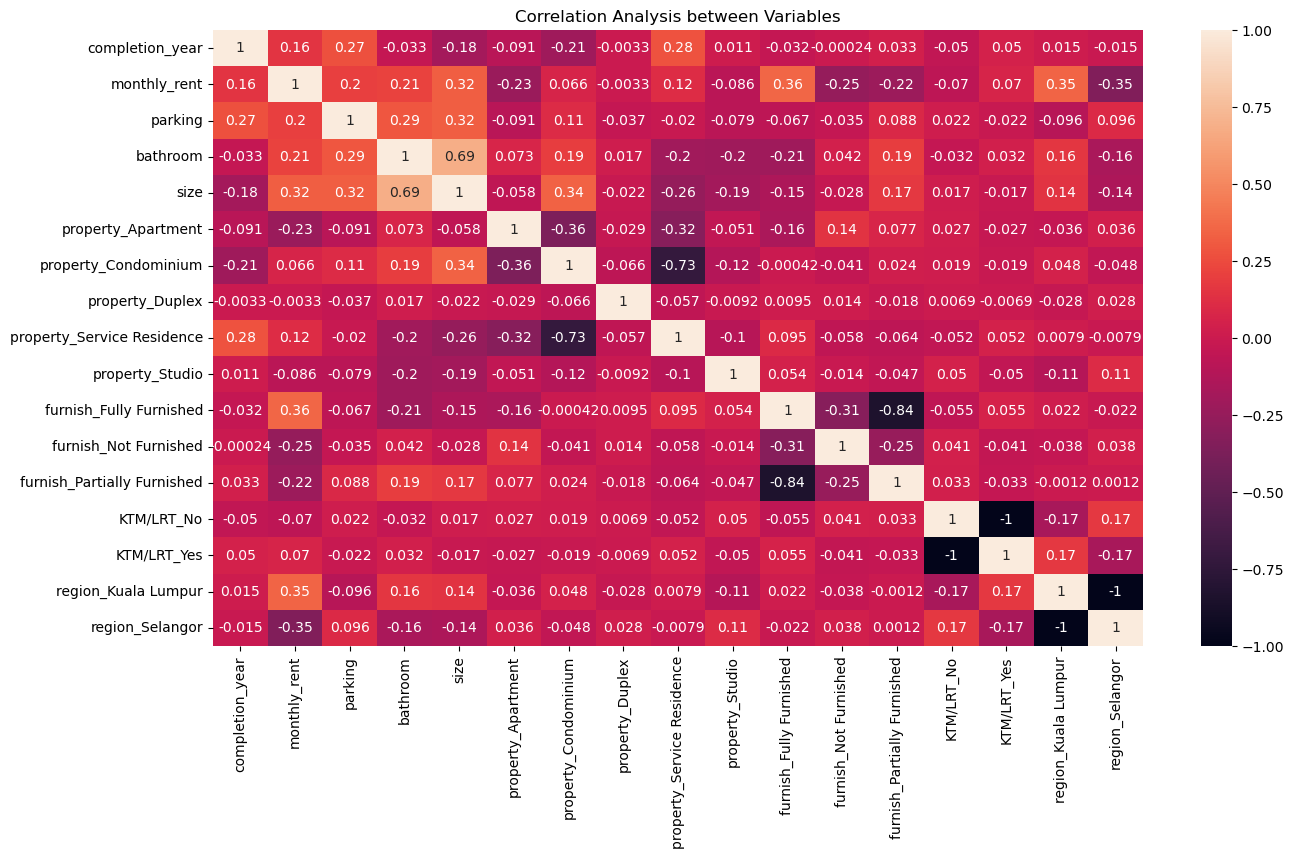

In [43]:
corr = model_rentaldf.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

plt.title('Correlation Analysis between Variables')
plt.show()

## ii) Feature Scaling using MinMaxScaler

In [44]:
#import necessary library. 3 models will be build and evaluated. 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [45]:
#Feature scaling for all features except the targeted variables.

x = model_rentaldf.drop(columns = ['monthly_rent', 'prop_name', 'decade',
                                   'district', 'facilities', 'additional_facilities'])
y = model_rentaldf['monthly_rent']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [46]:
x_scaled

,completion_year,parking,bathroom,size,property_Apartment,property_Condominium,property_Duplex,property_Service Residence,property_Studio,furnish_Fully Furnished,furnish_Not Furnished,furnish_Partially Furnished,KTM/LRT_No,KTM/LRT_Yes,region_Kuala Lumpur,region_Selangor
0,0.888889,0.000000,0.142857,0.357835,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.844444,0.000000,0.000000,0.323102,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.755556,0.000000,0.000000,0.363489,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.866667,0.000000,0.142857,0.458805,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.933333,0.111111,0.142857,0.646204,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,0.644444,0.000000,0.000000,0.282714,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6966,0.644444,0.000000,0.142857,0.387722,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6967,0.911111,0.111111,0.142857,0.577544,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
6968,0.844444,0.111111,0.285714,0.910339,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


# 4) Data Modeling

## i) Split train-test data

In [47]:
# Splitting of test and train data

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

## ii) Model Development

In [48]:
#Random Forest model
rf_model = RandomForestRegressor(criterion = 'squared_error', random_state = 42)

#train model
rf_model.fit(x_train, y_train)

#predict
y_pred_rf = rf_model.predict(x_test)

#evaluate 
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [49]:
print(f"RF - MSE: {mse_rf}, MAE: {mae_rf}, R2: {r2_rf}")

RF - MSE: 85543.64643878565, MAE: 199.16754814663875, R2: 0.671912388076806


In [50]:
#XGB model

#initialize model
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror',
                             random_state=42)

#train model
xgb_model.fit(x_train, y_train)

#predict
y_pred_xgb = xgb_model.predict(x_test)

#evaluate 
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [51]:
print(f"XGB - MSE: {mse_xgb}, MAE: {mae_xgb}, R2: {r2_xgb}")

XGB - MSE: 92245.03074816923, MAE: 212.28780278516464, R2: 0.6462104070861014


In [52]:
#DT model
dt_model = DecisionTreeRegressor(random_state = 42)

#train model
dt_model.fit(x_train, y_train)

#predict
y_pred_dt = dt_model.predict(x_test)

#evaluate 
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [53]:
print(f"DT - MSE: {mse_dt}, MAE: {mae_dt}, R2: {r2_dt}")

DT - MSE: 143154.67108477777, MAE: 234.97177638040264, R2: 0.45095543471525423


## iii) Hyperparameter Tuning

### Hyperparameter Tuning for Random Forest

In [85]:
params = {"n_estimators": [50, 100, 200, 300, 500 ],
          "max_features": ["sqrt", "log2"],
         'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]}

# RF gridsearch
rf_tree_grid = GridSearchCV(estimator = rf_model,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

rf_tree_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_mean_absolute_error')

In [86]:
rf_tree_grid.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [87]:
#RF model after GridSearchCV
rfgrid2_model = RandomForestRegressor(criterion = 'squared_error', 
                                     max_features = 'sqrt',
                                      min_samples_leaf = 1,
                                      min_samples_split = 2,
                                     n_estimators = 500,
                                     random_state = 42)

#train model
rfgrid2_model.fit(x_train, y_train)

#predict
y_pred_rf_grid2 = rfgrid2_model.predict(x_test)

#evaluate 
mse_rf_grid2 = mean_squared_error(y_test, y_pred_rf_grid2)
mae_rf_grid2 = mean_absolute_error(y_test, y_pred_rf_grid2)
r2_rf_grid2 = r2_score(y_test, y_pred_rf_grid2)

In [88]:
print(f"RF_GridSearchCV - MSE: {mse_rf_grid2}, MAE: {mae_rf_grid2}, R2: {r2_rf_grid2}")

RF_GridSearchCV - MSE: 88055.9155014948, MAE: 201.1139477080421, R2: 0.6622770219028542


### ii) Hyperparameter Tuning for XGBoost

In [89]:
xgb_params = {"n_estimators": [50, 100, 200, 300, 500 ],
          "learning_rate": [0.1, 0.05, 0.01]}

# RF gridsearch
xgb_grid = GridSearchCV(estimator = xgb_model,
                          param_grid = xgb_params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

xgb_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [90]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [91]:
#XGB model after GridSearchCV
xgb_grid = xgb.XGBRegressor(learning_rate = 0.1,
                            n_estimators = 500,
                            random_state = 42)

#train model
xgb_grid.fit(x_train, y_train)

#predict
y_pred_xgb_grid = xgb_grid.predict(x_test)

#evaluate 
mse_xgb_grid = mean_squared_error(y_test, y_pred_xgb_grid)
mae_xgb_grid = mean_absolute_error(y_test, y_pred_xgb_grid)
r2_xgb_grid = r2_score(y_test, y_pred_xgb_grid)

In [92]:
print(f"XGB_GridSearchCV - MSE: {mse_xgb_grid}, MAE: {mae_xgb_grid}, R2: {r2_xgb_grid}")

XGB_GridSearchCV - MSE: 86876.23561856657, MAE: 203.78050080878148, R2: 0.6668014766313619


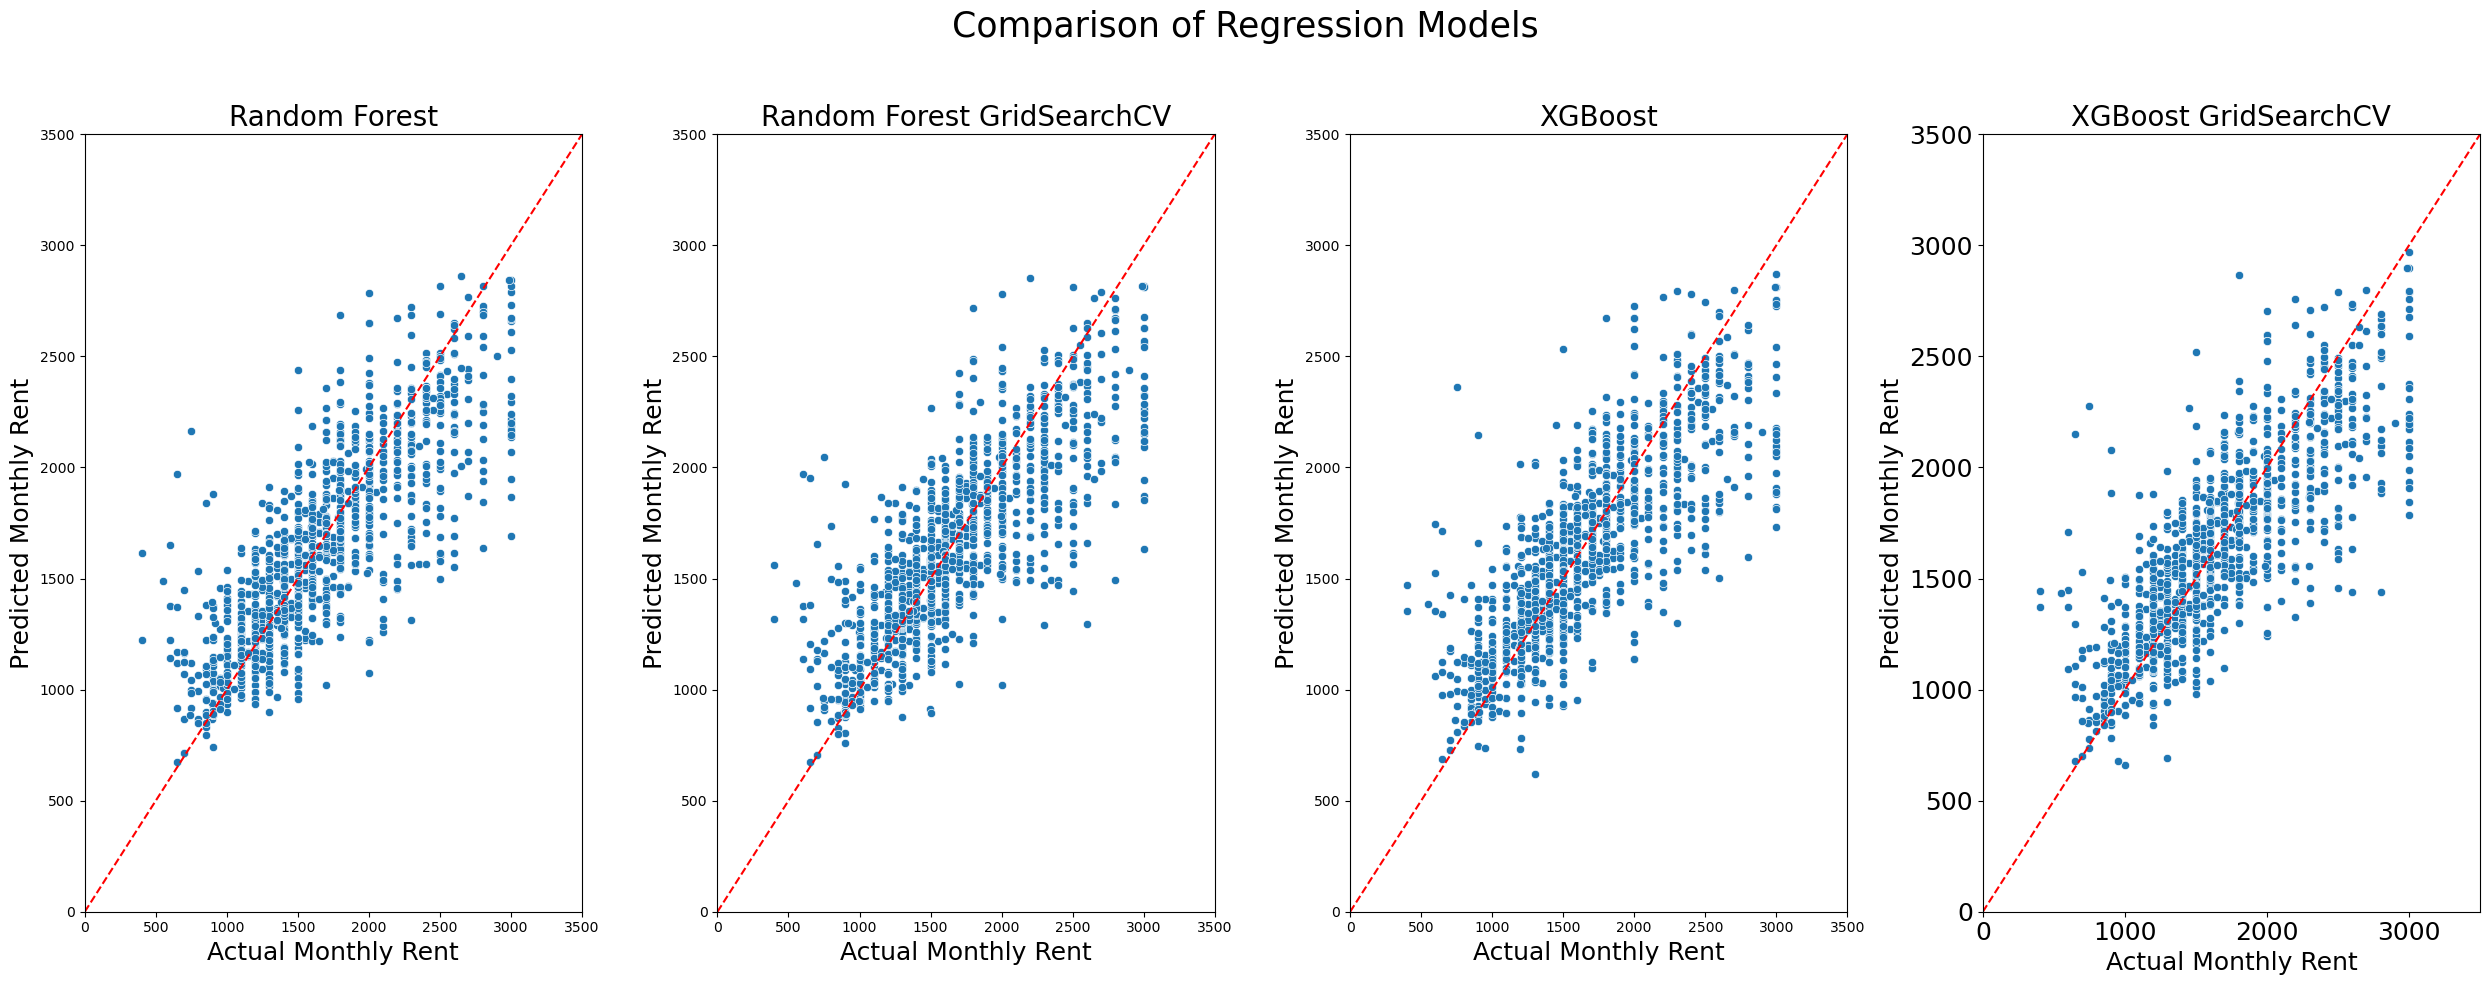

In [93]:
# Subplots for predicted values againts actual value for top 4 models
fig, axes = plt.subplots(1, 4, figsize=(25, 10))

# Scatter plot for Random Forest
sns.scatterplot(x=y_test, y=y_pred_rf, ax=axes[0])
axes[0].plot([0, 5500], [0, 5500], "--r")
axes[0].set_xlim(0, 3500)
axes[0].set_ylim(0, 3500)
axes[0].set_xlabel("Actual Monthly Rent", fontsize = 18)
axes[0].set_ylabel("Predicted Monthly Rent", fontsize = 18)
axes[0].set_title("Random Forest", fontsize = 20)

# Scatter plot for RandomForest GridSearchCV
sns.scatterplot(x=y_test, y=y_pred_rf_grid2, ax=axes[1])
axes[1].plot([0, 5500], [0, 5500], "--r")
axes[1].set_xlim(0, 3500)
axes[1].set_ylim(0, 3500)
axes[1].set_xlabel("Actual Monthly Rent", fontsize = 18)
axes[1].set_ylabel("Predicted Monthly Rent", fontsize = 18)
axes[1].set_title("Random Forest GridSearchCV", fontsize = 20)

# Scatter plot for XGBoost
sns.scatterplot(x=y_test, y=y_pred_xgb, ax=axes[2])
axes[2].plot([0, 5500], [0, 5500], "--r")
axes[2].set_xlim(0, 3500)
axes[2].set_ylim(0, 3500)
axes[2].set_xlabel("Actual Monthly Rent", fontsize = 18)
axes[2].set_ylabel("Predicted Monthly Rent", fontsize = 18)
axes[2].set_title("XGBoost", fontsize = 20)

# Scatter plot for XGBoost GridSearchCV
sns.scatterplot(x=y_test, y=y_pred_xgb_grid, ax=axes[3])
axes[3].plot([0, 5500], [0, 5500], "--r")
axes[3].set_xlim(0, 3500)
axes[3].set_ylim(0, 3500)
axes[3].set_xlabel("Actual Monthly Rent", fontsize = 18)
axes[3].set_ylabel("Predicted Monthly Rent", fontsize = 18)
axes[3].set_title("XGBoost GridSearchCV", fontsize = 20)

# Set the main title for the figure
fig.suptitle("Comparison of Regression Models", fontsize=25)

# Show the plot
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()

## Feature Importance

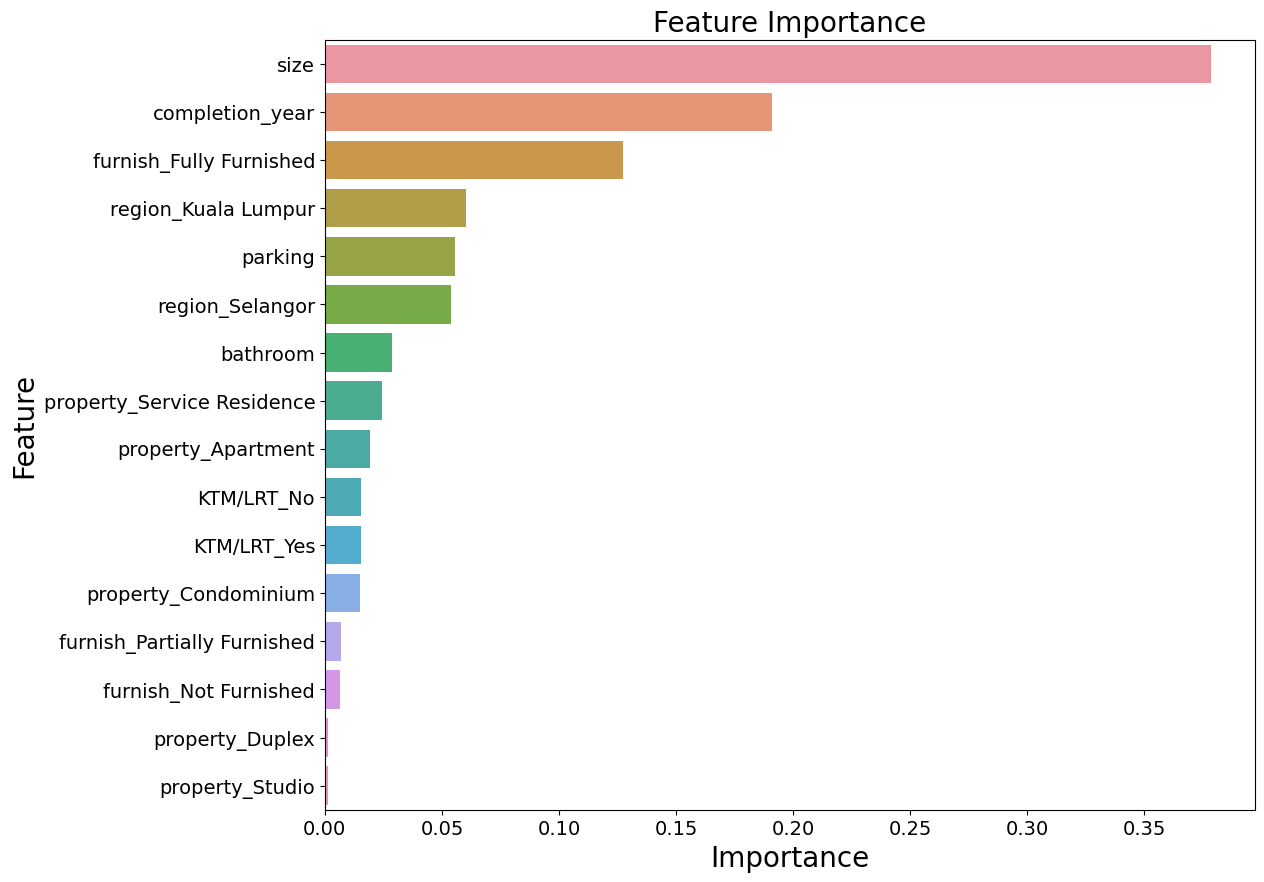

In [55]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': x_scaled.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance', fontsize = 20)
plt.xlabel('Importance', fontsize = 20)
plt.ylabel('Feature', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [56]:
round(importance_df,3)

,Feature,Importance
3,size,0.378
0,completion_year,0.191
9,furnish_Fully Furnished,0.127
14,region_Kuala Lumpur,0.060
1,parking,0.055
15,region_Selangor,0.054
2,bathroom,0.029
7,property_Service Residence,0.024
4,property_Apartment,0.019
12,KTM/LRT_No,0.015


In [80]:
import pandas as pd

new_data = pd.DataFrame({
    'completion_year': [2018],
    'parking': [1],
    'bathroom': [2],
    'size': [900],
    'property_Apartment': [0],
    'property_Condominium': [1],
    'property_Duplex': [0],
    'property_Service Residence': [0],
    'property_Studio': [0],
    'furnish_Fully Furnished': [1],
    'furnish_Not Furnished': [0],
    'furnish_Partially Furnished': [0],
    'KTM/LRT_No': [0],
    'KTM/LRT_Yes': [1],
    'region_Kuala Lumpur': [0],
    'region_Selangor': [1]
})

In [81]:
scaled_new_data = scaler.fit_transform(new_data)

In [84]:
# Assuming 'model' is your trained model object

prediction = rf_model.predict(scaled_new_data)

# Print or use the prediction as needed
print(prediction, '+/-', mae_rf)

[1125.32857143] +/- 199.16754814663875


C:\Users\1\Desktop\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
